In [9]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from skimage.feature import greycomatrix, greycoprops
from skimage import color
from skimage import io
from skimage import exposure
import natsort as ns
from PIL import Image

In [81]:
path = os.getcwd()

im_dir = r''+ path + '/../Zurich_dataset/images_tif/'
gt_dir = r''+ path + '/../Zurich_dataset/groundtruth/'

im_names = ns.natsorted(os.listdir(im_dir))
gt_names = ns.natsorted(os.listdir(gt_dir))
print("images: %i " % len(im_names))
print("ground truth images: %i " % len(gt_names))

images: 20 
ground truth images: 20 


In [93]:
def imgs_stretch_eq(image):
    # Contrast stretching of every band to its percentiles 2, 98
    img_stretch = image.copy()
    img_eq = image.copy()
    for band in range(np.shape(image)[-1]):
        p2, p98 = np.percentile(image[:,:,band], (2, 98))
        img_stretch[:,:,band] = exposure.rescale_intensity(image[:,:,band], in_range=(p2, p98), out_range =(0,1))
    
        # Equalization
        img_eq[:,:,band] = exposure.equalize_hist(image[:,:,band])
    return img_stretch, img_eq

def im_load(path):
    """load a TIF image"""
    max_size = 400 # for now, only return highest 400 pixels 
    image = np.asarray(io.imread(path)).astype(float)
    return np.asarray(image[:max_size,:max_size,:])


def concatenate_images(img, gt_img):
    'concatenate an image and its ground truth'
    nChannels = len(gt_img.shape)
    w = gt_img.shape[0]
    h = gt_img.shape[1]
    if nChannels == 3:
        cimg = np.concatenate((img, gt_img), axis=1)
    else:
        gt_img_3c = np.zeros((w, h, 3), dtype=np.uint8)
        gt_img8 = img_float_to_uint8(gt_img)          
        gt_img_3c[:,:,0] = gt_img8
        gt_img_3c[:,:,1] = gt_img8
        gt_img_3c[:,:,2] = gt_img8
        img8 = img_float_to_uint8(img)
        cimg = np.concatenate((img8, gt_img_3c), axis=1)
    return cimg

def get_im_patches(im, w, h):
    list_patches = []
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    is_2d = len(im.shape) < 3
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            if is_2d:
                im_patch = im[j:j+w, i:i+h]
            else:
                im_patch = im[j:j+w, i:i+h, :]
            list_patches.append(im_patch)
    return list_patches

In [94]:
im_stretch, im_eq = [],[]
for i in range(len(images)): # histogram stretching and equalization
    im_s, im_e = imgs_stretch_eq(images[i])
    im_stretch.append(im_s)
    im_eq.append(im_e)

In [95]:
images = np.asarray([im_load(im_dir + im_name) for im_name in im_names])
gt = np.asarray([im_load(gt_dir + gt_name) for gt_name in gt_names])

In [96]:
for var in images, images[0], gt, gt[0]:
    print(var.shape)

(20, 400, 400, 4)
(400, 400, 4)
(20, 400, 400, 3)
(400, 400, 3)


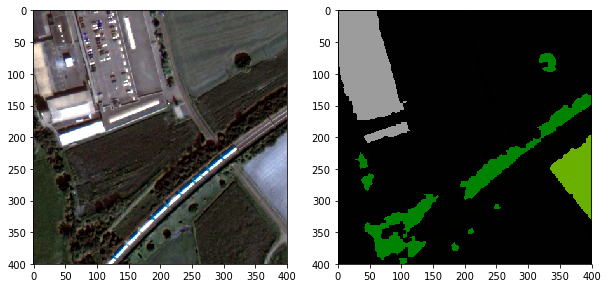

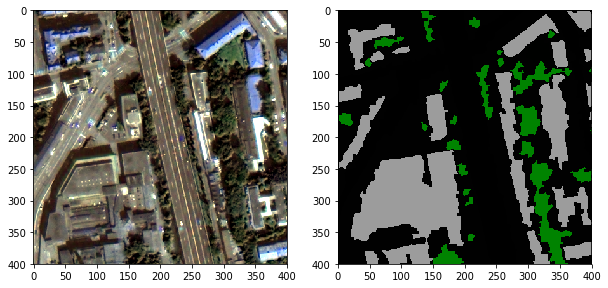

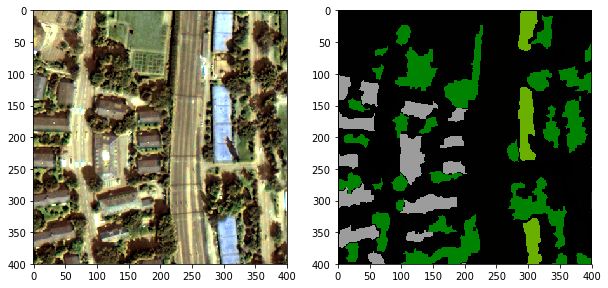

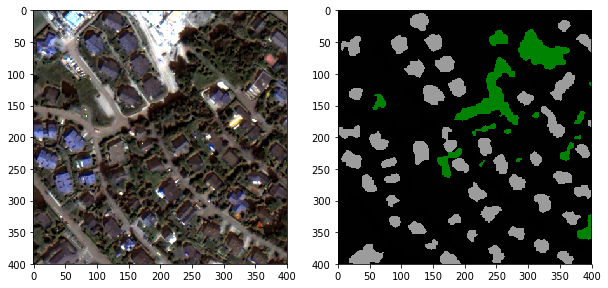

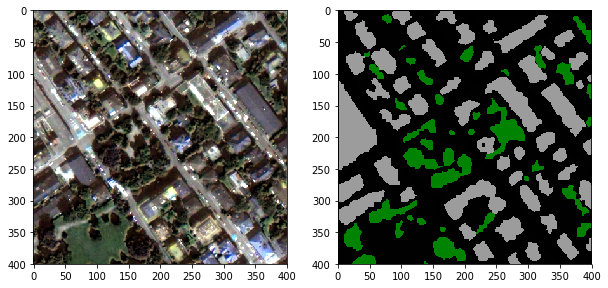

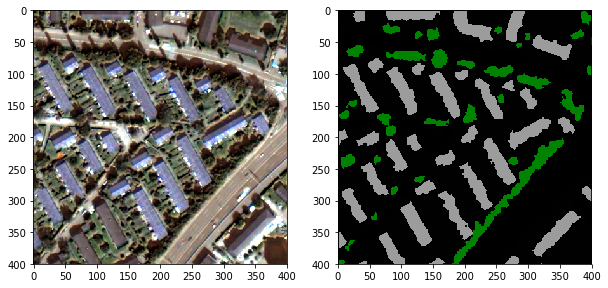

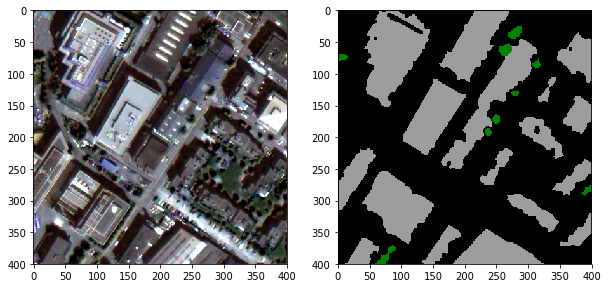

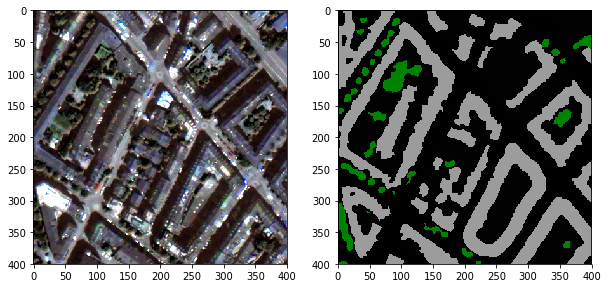

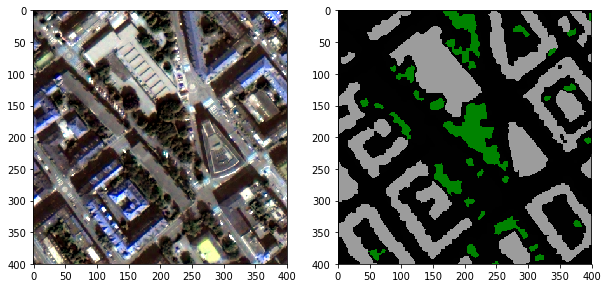

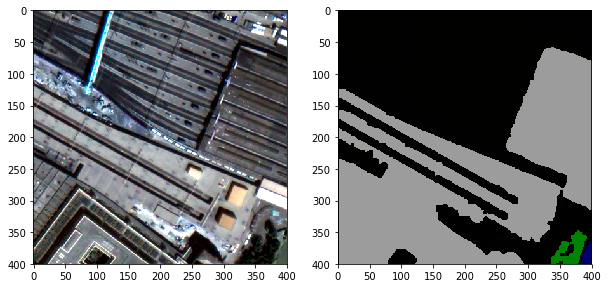

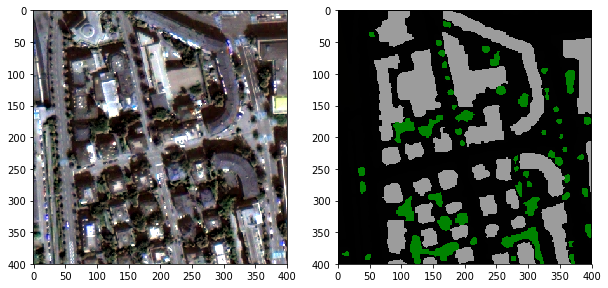

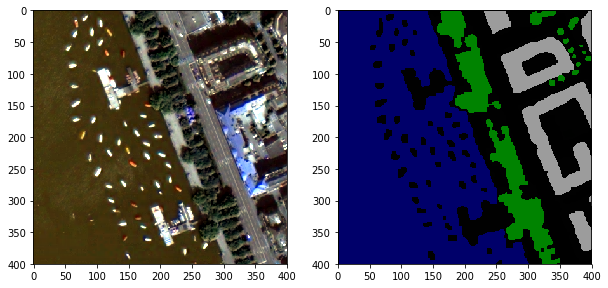

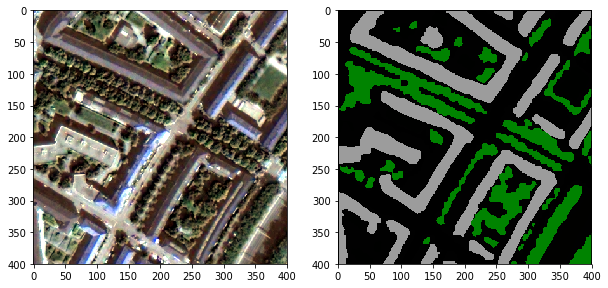

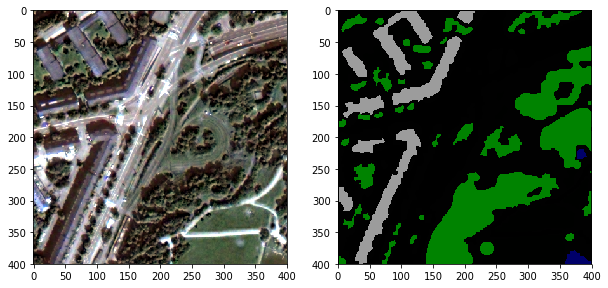

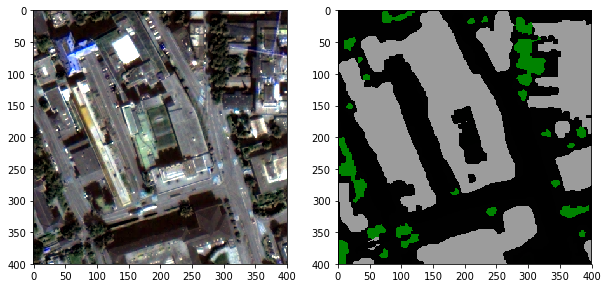

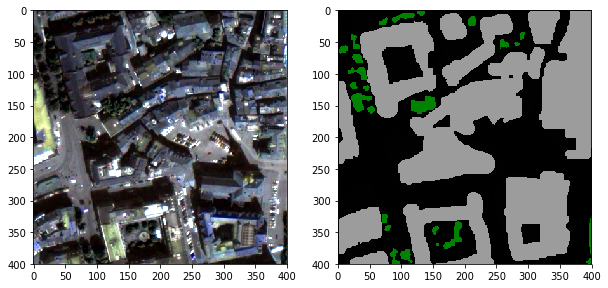

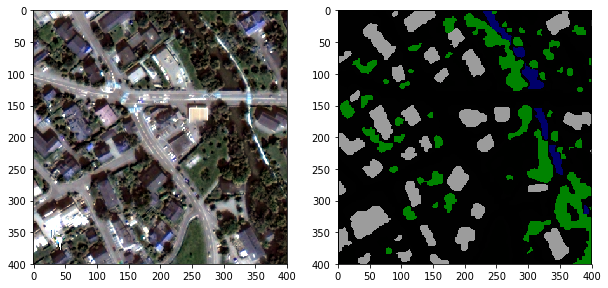

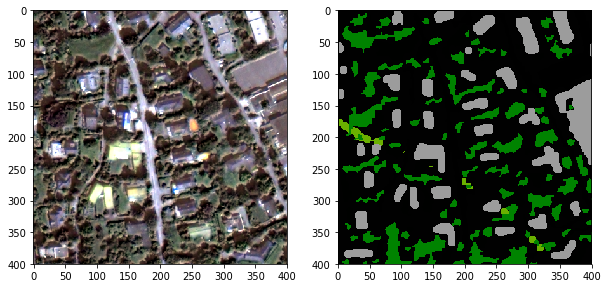

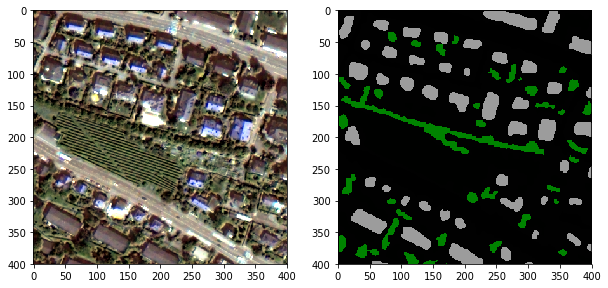

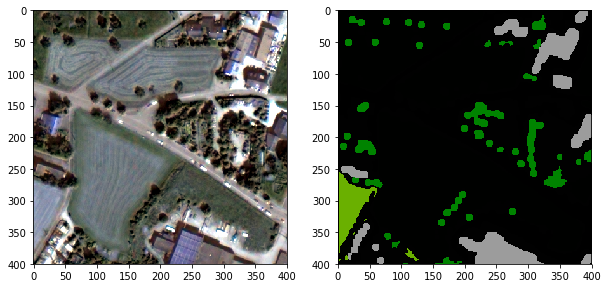

In [147]:
#print('Image size = ' + str(imgs[0].shape[0]) + ',' + str(imgs[0].shape[1]))

# Show first image and its groundtruth image
#cimg = concatenate_images(images[0][:,:,0:3], gt[0])
images_ind = np.arange(20)
for i in images_ind:
    fig, axes = plt.subplots(1,2)
    fig.set_size_inches(10,5)
    axes[0].imshow(im_stretch[i][:,:,0:3], cmap='Greys_r')
    axes[1].imshow(gt[i], cmap='Greys_r')
    plt.show()

In [98]:
images = im_stretch

In [149]:
im_patches = [get_im_patches(image,16,16) for image in images]
im_patches = np.asarray([im_patches[i][j] for i in range(len(im_patches)) for j in range(len(im_patches[i]))])

gt_patches = [get_im_patches(gt_im,16,16) for gt_im in gt]
gt_patches = np.asarray([gt_patches[i][j] for i in range(len(gt_patches)) for j in range(len(gt_patches[i]))])

In [150]:
print(np.shape(im_patches))
print(np.shape(gt_patches))
gt_patches = np.sum(gt_patches,axis=3) # sum of color values.


(12500, 16, 16, 4)
(12500, 16, 16, 3)


'for gt_patch in gt_patches:\n    for col in gt_patch:\n        for field in col:\n            if field == 765\n            '

In [151]:
gt_labels = np.unique(gt_patches)
gt_labels_new = np.arange(len(gt_labels))

"""for gt_patch in gt_patches:
    for col in gt_patch:
        for field in col:
            if field == 765
            """

'for gt_patch in gt_patches:\n    for col in gt_patch:\n        for field in col:\n            if field == 765\n            '

# Keras test

In [152]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import h5py
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np
import os


In [155]:
batch_size = 32
num_classes = 10
epochs = 1 # 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_train shape: (50000, 32, 32, 3)
y_train shape: (10000, 1)
50000 train samples
10000 test samples


In [4]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
# create model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=int(np.ceil(x_train.shape[0] / float(batch_size))),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4,use_multiprocessing=True)



Using real-time data augmentation.
Epoch 1/1
1563/1563 [==============================] - 210s 134ms/step - loss: 1.8712 - acc: 0.3138 - val_loss: 1.5574 - val_acc: 0.4405


In [7]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /Users/cyrilwendl/Documents/EPFL/SIE-Project/Code/saved_models/keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 10s 980us/step
Test loss: 1.55735621872
Test accuracy: 0.4405


In [9]:
classes = model.predict_classes(x_test)

In [1]:
from tensorflow.python.client import device_lib
from datetime import datetime
startTime= datetime.now()

print(device_lib.list_local_devices())

timeElapsed=datetime.now()-startTime

print('Time elpased (hh:mm:ss.ms) {}'.format(timeElapsed))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11368721228033051670
]
Time elpased (hh:mm:ss.ms) 0:00:00.001086
